In [ ]:
# First part of the project is isothermal calometery

In [ ]:
#Here I have coverted excel file to CSV file for easy understanding

In [ ]:
#Block for imports and other setting that will be required


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#creating a df to view our data


df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Isothermal_Calometry.csv')
df.head(10)

,Blend Type,Cumulative Heat (J/g)
0,100% PC,323.16
1,80% PC + 20% GPP,297.77
2,70% PC + 30% GPP,311.40
3,60% PC + 40% GPP,265.35
4,50% PC + 50% GPP,225.05
5,40% PC + 60% GPP,216.62
6,30% PC + 70% GPP,160.64
7,40% GPP + 60% SC,11.24
8,10% PC + 40% GPP + 50% SC,115.70
9,20% PC + 40% GPP + 40% SC,149.98


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Blend Type             92 non-null     object 
 1   Cumulative Heat (J/g)  92 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


# New Section

In [ ]:
df.describe()

,Cumulative Heat (J/g)
count,92.00000
mean,196.86413
std,49.14369
min,11.24000
25%,160.61500
50%,188.88500
75%,220.09000
max,323.16000


In [ ]:
df['Blend Type'].value_counts()


,count
Blend Type,
30% PC + 40% GPP + 30% CC,2
30% PC + 50% GPP + 20% CC,2
100% PC,1
30% PLC + 30% GPP + 40% VA,1
30% PLC + 10% GPP + 60% VA,1
...,...
30% PC + 50% GPP + 20% VA,1
30% PC + 30% GPP + 40% VA,1
30% PC + 20% GPP + 50% VA,1


In [ ]:
df['Blend Type'].nunique()

90

In [ ]:
# Example of standardizing labels
df['Blend Type'] = df['Blend Type'].str.strip()  # Remove any extra spaces


In [ ]:
df.head(10)

,Blend Type,Cumulative Heat (J/g)
0,100% PC,323.16
1,80% PC + 20% GPP,297.77
2,70% PC + 30% GPP,311.40
3,60% PC + 40% GPP,265.35
4,50% PC + 50% GPP,225.05
5,40% PC + 60% GPP,216.62
6,30% PC + 70% GPP,160.64
7,40% GPP + 60% SC,11.24
8,10% PC + 40% GPP + 50% SC,115.70
9,20% PC + 40% GPP + 40% SC,149.98


In [ ]:
df.isnull().sum()

,0
Blend Type,0
Cumulative Heat (J/g),0


In [ ]:
df.duplicated().sum()

0

In [ ]:
unique_blends = df['Blend Type'].unique()
blend_mapping = {blend: f'Blend Type {i+1}' for i, blend in enumerate(unique_blends)}

In [ ]:
print(blend_mapping)

{'100% PC': 'Blend Type 1', '80% PC + 20% GPP': 'Blend Type 2', '70% PC + 30% GPP': 'Blend Type 3', '60% PC + 40% GPP': 'Blend Type 4', '50% PC + 50% GPP': 'Blend Type 5', '40% PC + 60% GPP': 'Blend Type 6', '30% PC + 70% GPP': 'Blend Type 7', '40% GPP + 60% SC': 'Blend Type 8', '10% PC + 40% GPP + 50% SC': 'Blend Type 9', '20% PC + 40% GPP + 40% SC': 'Blend Type 10', '30% PC + 40% GPP + 30% SC': 'Blend Type 11', '40% PC + 40% GPP + 20% SC': 'Blend Type 12', '50% PC + 40% GPP + 10% SC': 'Blend Type 13', '30% PC + 60% GPP + 10% SC': 'Blend Type 14', '30% PC + 50% GPP + 20% SC': 'Blend Type 15', '30% PC + 30% GPP + 40% SC': 'Blend Type 16', '30% PC + 20% GPP + 50% SC': 'Blend Type 17', '30% PC + 10% GPP + 60% SC': 'Blend Type 18', '30% PC + 30% GPP + 40% CC': 'Blend Type 19', '30% PC + 50% GPP + 20% CC': 'Blend Type 20', '30% PC + 40% GPP + 30% CC': 'Blend Type 21', '30% PC + 60% GPP + 10% CC': 'Blend Type 22', '30% PC + 50% GPP + 20% FA': 'Blend Type 23', '30% PC + 40% GPP + 30% FA': 'B

In [ ]:
df['Blend Category'] = df['Blend Type'].map(blend_mapping)

In [ ]:
df.head(5)

,Blend Type,Cumulative Heat (J/g),Blend Category
0,100% PC,323.16,Blend Type 1
1,80% PC + 20% GPP,297.77,Blend Type 2
2,70% PC + 30% GPP,311.40,Blend Type 3
3,60% PC + 40% GPP,265.35,Blend Type 4
4,50% PC + 50% GPP,225.05,Blend Type 5


In [ ]:
df.columns

Index(['Blend Type', 'Cumulative Heat (J/g)', 'Blend Category'], dtype='object')

In [ ]:
df.rename(columns={'Cumulative Heat (J/g)': 'Cumulative Heat'}, inplace=True)

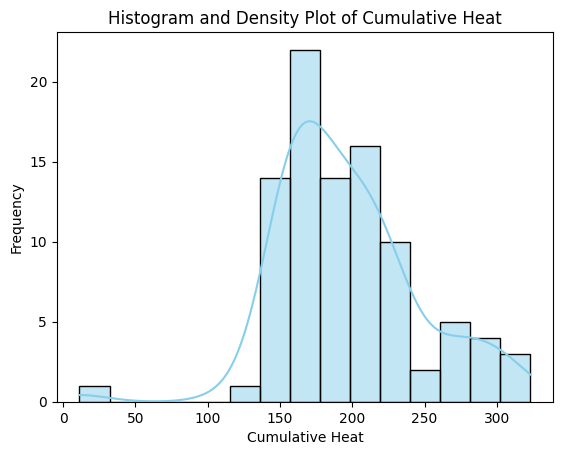

In [ ]:

sns.histplot(df['Cumulative Heat'], kde=True, bins=15, color='skyblue', edgecolor='black')
plt.xlabel('Cumulative Heat')
plt.ylabel('Frequency')
plt.title('Histogram and Density Plot of Cumulative Heat')
plt.show()


The distribution appears to be slightly right-skewed. This aligns with the statistical summary we saw earlier, where the mean was slightly higher than the median. The right skew suggests that a few samples have higher cumulative heat values, pulling the distribution tail to the right.

Most values fall between approximately 150 and 250 J/g. This central clustering shows that the majority of blend types release cumulative heat within this range.

The density curve (KDE) peaks around 180–200 J/g, which indicates that this is the most common range of cumulative heat in the data. The gradual decline to the right confirms that higher heat values are less frequent.

In [ ]:
from scipy.stats import zscore

df['Z-score'] = zscore(df['Cumulative Heat'])
outliers = df[df['Z-score'].abs() > 3]  # Outliers typically have Z-scores > 3
print(outliers)



         Blend Type  Cumulative Heat Blend Category   Z-score
7  40% GPP + 60% SC            11.24   Blend Type 8 -3.797868


This blend (40% GPP + 60% SC) is an outlier due to its exceptionally low cumulative heat value, likely influenced by the materials used in its composition. The Z-score of -3.8 confirms it as an extreme data point. Further investigation into this blend type might be valuable, especially if low heat release is a desirable characteristic for certain applications.

In [ ]:
percentiles = df['Cumulative Heat'].quantile([0.1, 0.25, 0.5, 0.75, 0.9])
print("Percentiles:\n", percentiles)


Percentiles:
 0.10    153.868
0.25    160.615
0.50    188.885
0.75    220.090
0.90    274.530
Name: Cumulative Heat, dtype: float64


Most of the cumulative heat values fall between the 25th (160.62 J/g) and 75th (220.09 J/g) percentiles, which can be considered the typical range for this dataset.

In [ ]:
Q1 = df['Cumulative Heat'].quantile(0.25)
Q3 = df['Cumulative Heat'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['Cumulative Heat'] < (Q1 - 1.5 * IQR)) | (df['Cumulative Heat'] > (Q3 + 1.5 * IQR))]
print("Outliers based on IQR:\n", outliers)


Outliers based on IQR:
          Blend Type  Cumulative Heat Blend Category   Z-score
0           100% PC           323.16   Blend Type 1  2.584012
2  70% PC + 30% GPP           311.40   Blend Type 3  2.343403
7  40% GPP + 60% SC            11.24   Blend Type 8 -3.797868


In [ ]:
skewness = df['Cumulative Heat'].skew()
kurtosis = df['Cumulative Heat'].kurt()
print(f"Skewness: {skewness}, Kurtosis: {kurtosis}")


Skewness: 0.21181434385620662, Kurtosis: 1.7874375217009937


the skewness and kurtosis values confirm that Cumulative Heat has an almost normal distribution, with minimal skew and a slightly flatter spread than a typical normal curve. This is favorable for many standard analyses and modeling approaches

CREATED A NEW CSV OUT OF THE OLD ONE, WHERE EACH CHEMICAL COLUMN REPRESENTS PERCENTAGE OF THAT CHEMICAL IN THE BLEND, THIS IS HAS INCREASED NO.OF COLUMNS WHILE ALSO GIVING ROOM FOR ANALYSIS.

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/new_iso.csv')
df1.head()

,Original Blend Name,Blend Number,PC,GPP,SC,CC,FA,VA,GBA,FBC,QUARTZ,PLC,Cumulative Heat (J/g),Unnamed: 13
0,100% PC,0,100,0,0,0,0,0,0,0,0,0,323.16,NaN
1,80% PC + 20% GPP,1,80,20,0,0,0,0,0,0,0,0,297.77,NaN
2,70% PC + 30% GPP,2,70,30,0,0,0,0,0,0,0,0,311.40,NaN
3,60% PC + 40% GPP,3,60,40,0,0,0,0,0,0,0,0,265.35,NaN
4,50% PC + 50% GPP,4,50,50,0,0,0,0,0,0,0,0,225.05,NaN


In [ ]:
df1 = df1.drop(columns=['Unnamed: 13'])

df1.head()

,Original Blend Name,Blend Number,PC,GPP,SC,CC,FA,VA,GBA,FBC,QUARTZ,PLC,Cumulative Heat (J/g)
0,100% PC,0,100,0,0,0,0,0,0,0,0,0,323.16
1,80% PC + 20% GPP,1,80,20,0,0,0,0,0,0,0,0,297.77
2,70% PC + 30% GPP,2,70,30,0,0,0,0,0,0,0,0,311.40
3,60% PC + 40% GPP,3,60,40,0,0,0,0,0,0,0,0,265.35
4,50% PC + 50% GPP,4,50,50,0,0,0,0,0,0,0,0,225.05


<Axes: xlabel='PC'>

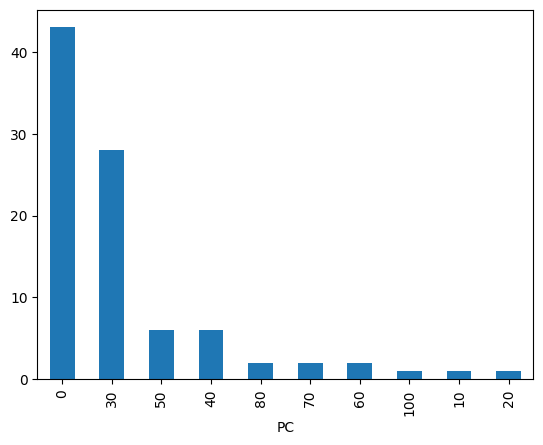

In [ ]:
df1['PC'].value_counts().plot(kind="bar")

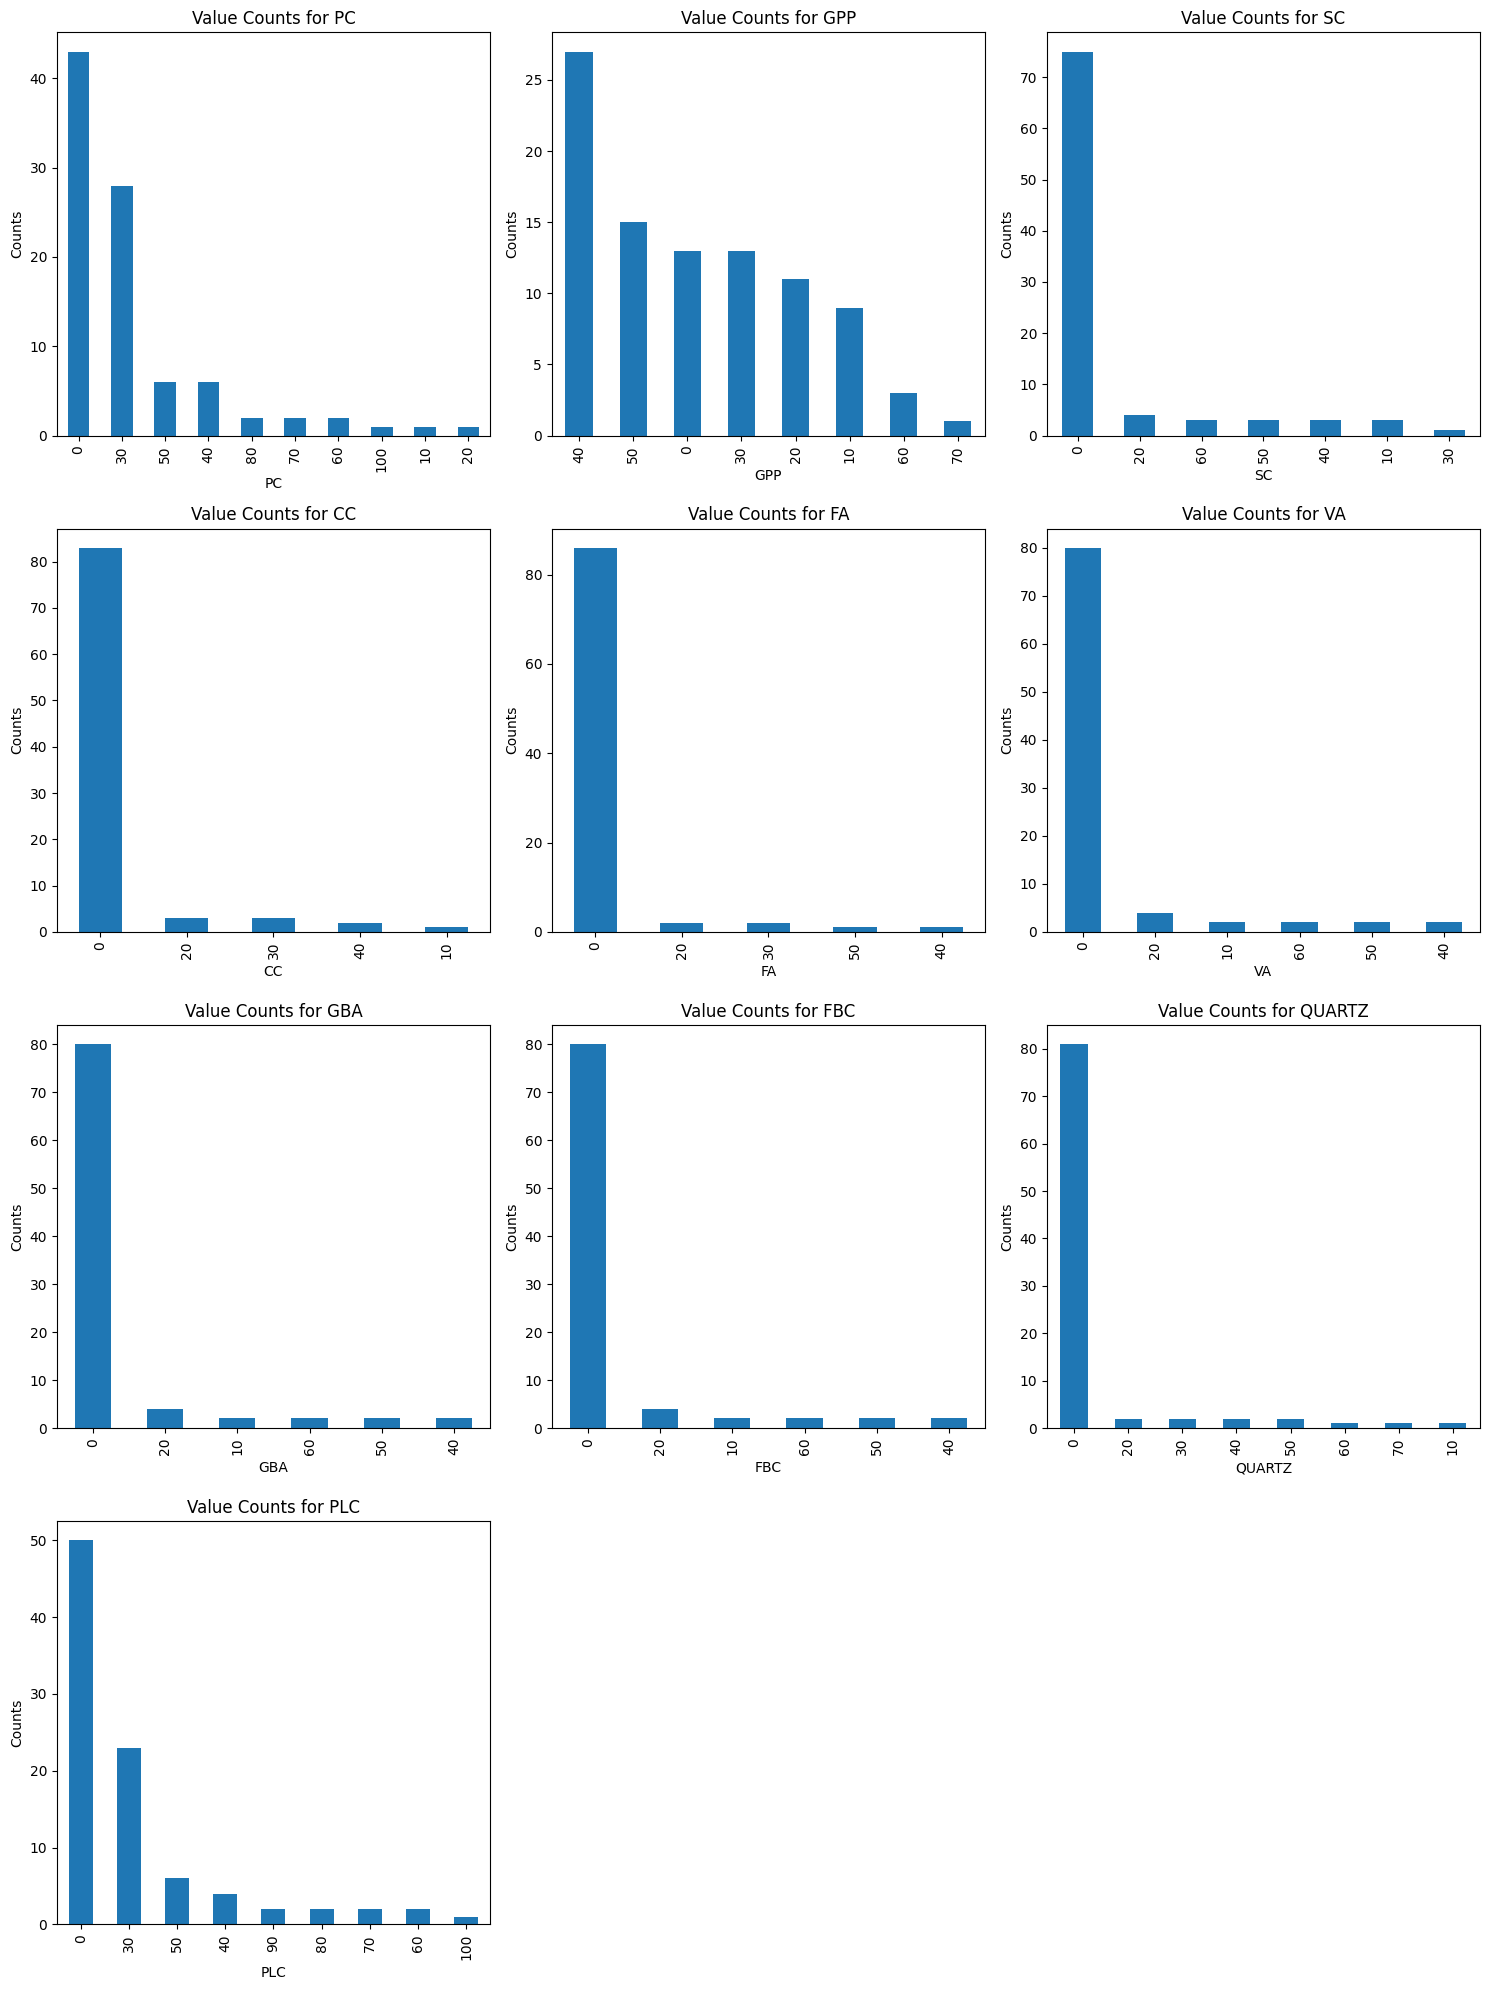

In [ ]:



# Filter out columns that are not 'blend type' or 'blend original type'
columns_to_plot = [col for col in df1.columns if col not in ['Original Blend Name',	'Blend Number'] and (df1[col].dtype == 'object' or df1[col].nunique() < 20)]

# Set up a grid layout for subplots
num_cols = len(columns_to_plot)
num_rows = (num_cols + 2) // 3

fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows * 5))
axes = axes.flatten()

# Generate bar plots for each selected column
for i, col in enumerate(columns_to_plot):
    df1[col].value_counts().plot(kind="bar", ax=axes[i])
    axes[i].set_title(f'Value Counts for {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Counts')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


In [ ]:
def classify_blend_type(blend_name):
    # Count the number of components in the blend (separated by '+')
    components = blend_name.split('+')
    # Classify based on the count of components
    if len(components) == 2:
        return 'Binary'
    elif len(components) == 3:
        return 'Ternary'
    else:
        return 'Other'

# Apply the function to create a new column
df1['Blend Type'] = df1['Original Blend Name'].apply(classify_blend_type)

In [ ]:
df1.head()

,Original Blend Name,Blend Number,PC,GPP,SC,CC,FA,VA,GBA,FBC,QUARTZ,PLC,Cumulative Heat (J/g),Blend Type
0,100% PC,0,100,0,0,0,0,0,0,0,0,0,323.16,Other
1,80% PC + 20% GPP,1,80,20,0,0,0,0,0,0,0,0,297.77,Binary
2,70% PC + 30% GPP,2,70,30,0,0,0,0,0,0,0,0,311.40,Binary
3,60% PC + 40% GPP,3,60,40,0,0,0,0,0,0,0,0,265.35,Binary
4,50% PC + 50% GPP,4,50,50,0,0,0,0,0,0,0,0,225.05,Binary


In [ ]:
df1['Blend Type']

,Blend Type
0,Other
1,Binary
2,Binary
3,Binary
4,Binary
...,...
87,Binary
88,Binary
89,Binary
90,Binary


In [ ]:
import regex as re

In [ ]:
# Function to extract PC or PLC percentage and calculate replacement level
def calculate_replacement_level_from_name(blend_name):
    # Find the percentage of PC or PLC using regex
    pc_plc_match = re.search(r'(\d+)%\s*(PC|PLC)', blend_name, re.IGNORECASE)
    if pc_plc_match:
        percentage = int(pc_plc_match.group(1))  # Extract percentage as integer
        return 100 - percentage  # Replacement level is 100 - PC or PLC percentage
    else:
        return None  # If no PC or PLC is mentioned, return None


df1['Replacement Level'] = df1['Original Blend Name'].apply(calculate_replacement_level_from_name)

In [ ]:
df1.head()

,Original Blend Name,Blend Number,PC,GPP,SC,CC,FA,VA,GBA,FBC,QUARTZ,PLC,Cumulative Heat (J/g),Blend Type,Replacement Level
0,100% PC,0,100,0,0,0,0,0,0,0,0,0,323.16,Other,0.0
1,80% PC + 20% GPP,1,80,20,0,0,0,0,0,0,0,0,297.77,Binary,20.0
2,70% PC + 30% GPP,2,70,30,0,0,0,0,0,0,0,0,311.40,Binary,30.0
3,60% PC + 40% GPP,3,60,40,0,0,0,0,0,0,0,0,265.35,Binary,40.0
4,50% PC + 50% GPP,4,50,50,0,0,0,0,0,0,0,0,225.05,Binary,50.0


In [ ]:
df1.groupby('Blend Type')['Replacement Level'].value_counts()

Blend Type  Replacement Level
Binary      20.0                  4
            30.0                  4
            40.0                  4
            50.0                  4
            10.0                  2
            60.0                  2
            70.0                  2
Other       0.0                   2
Ternary     70.0                 49
            50.0                  8
            60.0                  8
            80.0                  1
            90.0                  1
Name: count, dtype: int64

In [ ]:
df1.head(15)

,Original Blend Name,Blend Number,PC,GPP,SC,CC,FA,VA,GBA,FBC,QUARTZ,PLC,Cumulative Heat (J/g),Blend Type,Replacement Level
0,100% PC,0,100,0,0,0,0,0,0,0,0,0,323.16,Other,0.0
1,80% PC + 20% GPP,1,80,20,0,0,0,0,0,0,0,0,297.77,Binary,20.0
2,70% PC + 30% GPP,2,70,30,0,0,0,0,0,0,0,0,311.40,Binary,30.0
3,60% PC + 40% GPP,3,60,40,0,0,0,0,0,0,0,0,265.35,Binary,40.0
4,50% PC + 50% GPP,4,50,50,0,0,0,0,0,0,0,0,225.05,Binary,50.0
5,40% PC + 60% GPP,5,40,60,0,0,0,0,0,0,0,0,216.62,Binary,60.0
6,30% PC + 70% GPP,6,30,70,0,0,0,0,0,0,0,0,160.64,Binary,70.0
7,40% GPP + 60% SC,7,0,40,60,0,0,0,0,0,0,0,11.24,Binary,NaN
8,10% PC + 40% GPP + 50% SC,8,10,40,50,0,0,0,0,0,0,0,115.70,Ternary,90.0
9,20% PC + 40% GPP + 40% SC,9,20,40,40,0,0,0,0,0,0,0,149.98,Ternary,80.0


In [ ]:
df1.head(10)

,Original Blend Name,Blend Number,PC,GPP,SC,CC,FA,VA,GBA,FBC,QUARTZ,PLC,Cumulative Heat (J/g),Blend Type,Replacement Level
0,100% PC,0,100,0,0,0,0,0,0,0,0,0,323.16,Other,0.0
1,80% PC + 20% GPP,1,80,20,0,0,0,0,0,0,0,0,297.77,Binary,20.0
2,70% PC + 30% GPP,2,70,30,0,0,0,0,0,0,0,0,311.40,Binary,30.0
3,60% PC + 40% GPP,3,60,40,0,0,0,0,0,0,0,0,265.35,Binary,40.0
4,50% PC + 50% GPP,4,50,50,0,0,0,0,0,0,0,0,225.05,Binary,50.0
5,40% PC + 60% GPP,5,40,60,0,0,0,0,0,0,0,0,216.62,Binary,60.0
6,30% PC + 70% GPP,6,30,70,0,0,0,0,0,0,0,0,160.64,Binary,70.0
7,40% GPP + 60% SC,7,0,40,60,0,0,0,0,0,0,0,11.24,Binary,NaN
8,10% PC + 40% GPP + 50% SC,8,10,40,50,0,0,0,0,0,0,0,115.70,Ternary,90.0
9,20% PC + 40% GPP + 40% SC,9,20,40,40,0,0,0,0,0,0,0,149.98,Ternary,80.0


In [ ]:
df1 = df1.fillna('0.0')

In [ ]:
df1.head(10)

,Original Blend Name,Blend Number,PC,GPP,SC,CC,FA,VA,GBA,FBC,QUARTZ,PLC,Cumulative Heat (J/g),Blend Type,Replacement Level
0,100% PC,0,100,0,0,0,0,0,0,0,0,0,323.16,Other,0.0
1,80% PC + 20% GPP,1,80,20,0,0,0,0,0,0,0,0,297.77,Binary,20.0
2,70% PC + 30% GPP,2,70,30,0,0,0,0,0,0,0,0,311.40,Binary,30.0
3,60% PC + 40% GPP,3,60,40,0,0,0,0,0,0,0,0,265.35,Binary,40.0
4,50% PC + 50% GPP,4,50,50,0,0,0,0,0,0,0,0,225.05,Binary,50.0
5,40% PC + 60% GPP,5,40,60,0,0,0,0,0,0,0,0,216.62,Binary,60.0
6,30% PC + 70% GPP,6,30,70,0,0,0,0,0,0,0,0,160.64,Binary,70.0
7,40% GPP + 60% SC,7,0,40,60,0,0,0,0,0,0,0,11.24,Binary,0.0
8,10% PC + 40% GPP + 50% SC,8,10,40,50,0,0,0,0,0,0,0,115.70,Ternary,90.0
9,20% PC + 40% GPP + 40% SC,9,20,40,40,0,0,0,0,0,0,0,149.98,Ternary,80.0


In [ ]:
dfreplace = df1.groupby(['Replacement Level','Blend Type'])['Cumulative Heat (J/g)'].mean()

In [ ]:
dfreplace.head(10)

Replacement Level  Blend Type
0.0                Other         313.15500
10.0               Binary        287.52000
20.0               Binary        288.69250
30.0               Binary        275.70500
40.0               Binary        244.14500
50.0               Binary        213.92500
                   Ternary       224.31375
60.0               Binary        198.40500
                   Ternary       197.19375
70.0               Binary        153.01500
Name: Cumulative Heat (J/g), dtype: float64

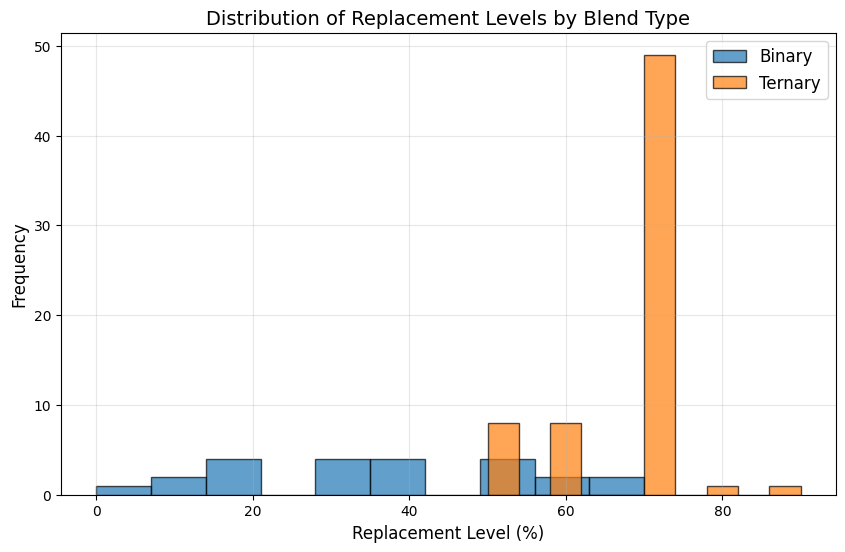

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure the 'Replacement Level' column is numeric
df1['Replacement Level'] = pd.to_numeric(df1['Replacement Level'], errors='coerce')

# Filter binary and ternary blends
binary_blends = df1[df1['Blend Type'] == 'Binary']
ternary_blends = df1[df1['Blend Type'] == 'Ternary']

# Create histograms for replacement levels
plt.figure(figsize=(10, 6))
plt.hist(binary_blends['Replacement Level'].dropna(), bins=10, alpha=0.7, label='Binary', edgecolor='black')
plt.hist(ternary_blends['Replacement Level'].dropna(), bins=10, alpha=0.7, label='Ternary', edgecolor='black')

# Add labels, title, and legend
plt.title("Distribution of Replacement Levels by Blend Type", fontsize=14)
plt.xlabel("Replacement Level (%)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend(fontsize=12)

# Add grid for better visualization
plt.grid(alpha=0.3)

# Display the plot
plt.show()


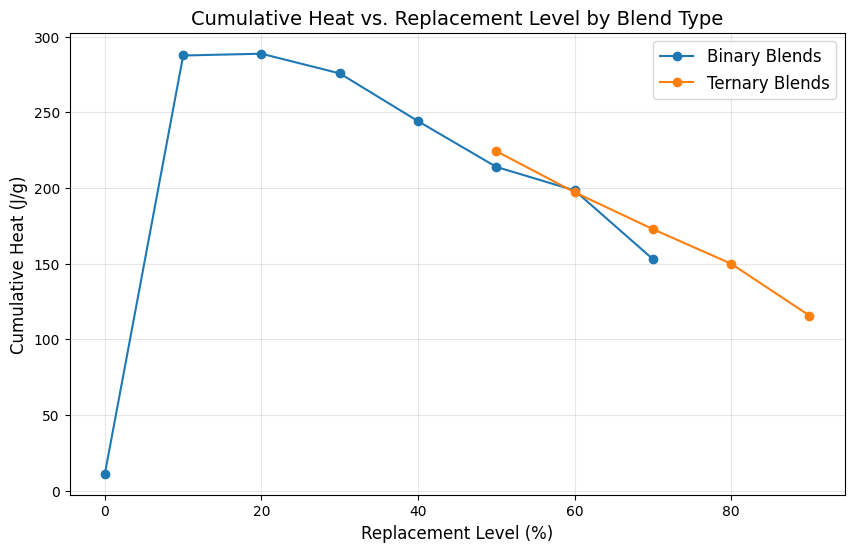

In [ ]:
import matplotlib.pyplot as plt

# Group by 'Replacement Level' and 'Blend Type', and calculate the mean heat
binary_means = df1[df1['Blend Type'] == 'Binary'].groupby('Replacement Level')['Cumulative Heat (J/g)'].mean()
ternary_means = df1[df1['Blend Type'] == 'Ternary'].groupby('Replacement Level')['Cumulative Heat (J/g)'].mean()

# Plot the trends
plt.figure(figsize=(10, 6))
plt.plot(binary_means.index, binary_means.values, marker='o', label='Binary Blends')
plt.plot(ternary_means.index, ternary_means.values, marker='o', label='Ternary Blends')

# Add labels, title, and legend
plt.title("Cumulative Heat vs. Replacement Level by Blend Type", fontsize=14)
plt.xlabel("Replacement Level (%)", fontsize=12)
plt.ylabel("Cumulative Heat (J/g)", fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)

# Display the plot
plt.show()


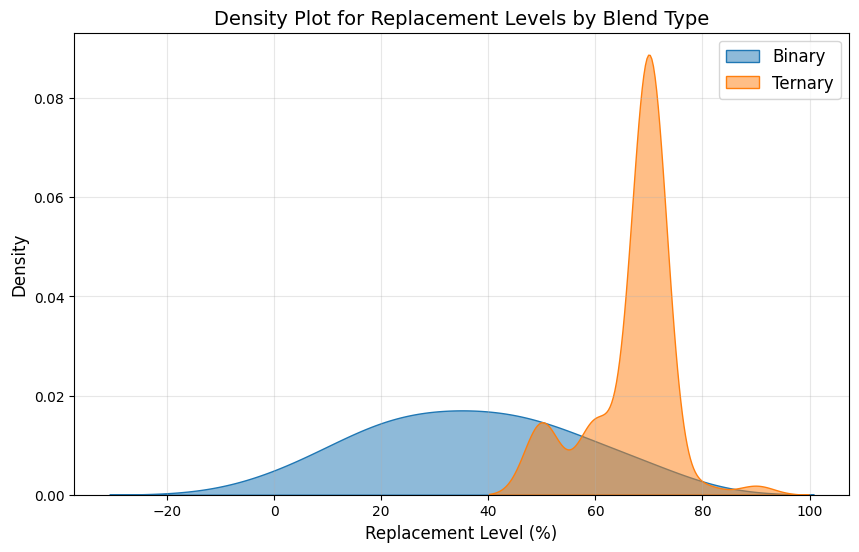

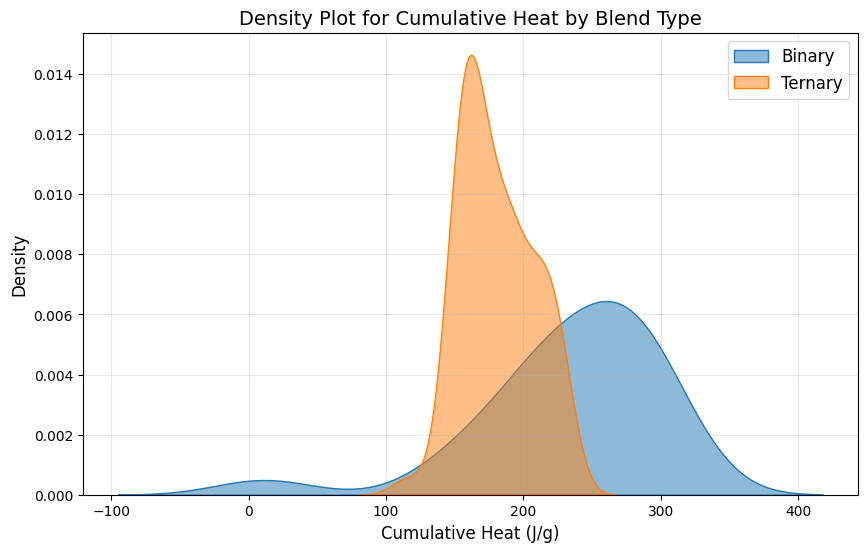

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Density Plot for Replacement Levels
plt.figure(figsize=(10, 6))
sns.kdeplot(data=binary_blends, x='Replacement Level', label='Binary', fill=True, alpha=0.5)
sns.kdeplot(data=ternary_blends, x='Replacement Level', label='Ternary', fill=True, alpha=0.5)
plt.title("Density Plot for Replacement Levels by Blend Type", fontsize=14)
plt.xlabel("Replacement Level (%)", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.show()

# Density Plot for Cumulative Heat
plt.figure(figsize=(10, 6))
sns.kdeplot(data=binary_blends, x='Cumulative Heat (J/g)', label='Binary', fill=True, alpha=0.5)
sns.kdeplot(data=ternary_blends, x='Cumulative Heat (J/g)', label='Ternary', fill=True, alpha=0.5)
plt.title("Density Plot for Cumulative Heat by Blend Type", fontsize=14)
plt.xlabel("Cumulative Heat (J/g)", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.show()


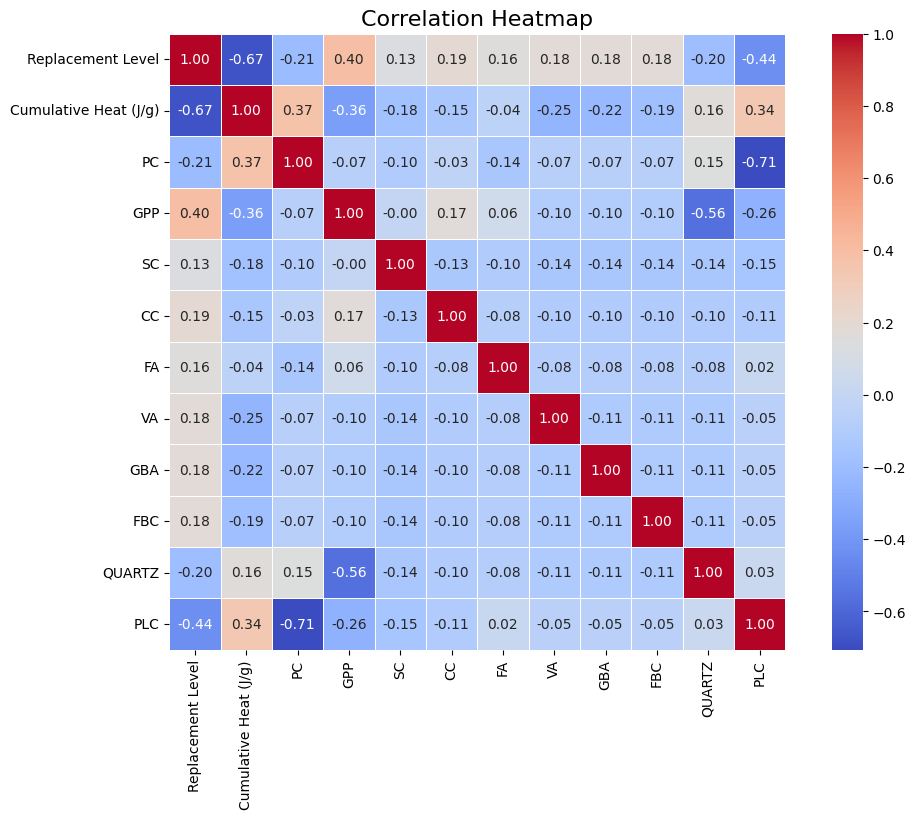

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns for the heatmap
numeric_columns = ['Replacement Level', 'Cumulative Heat (J/g)', 'PC', 'GPP', 'SC', 'CC', 'FA', 'VA', 'GBA', 'FBC', 'QUARTZ', 'PLC']
numeric_df = df1[numeric_columns]

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, square=True)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Step 1: Normalize Features
features = df1[['PC', 'GPP', 'SC', 'CC', 'FA', 'VA', 'GBA', 'FBC', 'QUARTZ', 'PLC', 'Replacement Level']]
target = df1['Cumulative Heat (J/g)']

# Apply MinMaxScaler
scaler = MinMaxScaler()
normalized_features = scaler.fit_transform(features)

# Convert back to DataFrame for easier handling
normalized_features_df = pd.DataFrame(normalized_features, columns=features.columns)

# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(normalized_features_df, target, test_size=0.2, random_state=42)

# Step 3: Train Models
# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Step 4: Predictions
y_pred_linear = linear_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

# Step 5: Evaluate Models
metrics = {
    'Model': ['Linear Regression', 'Random Forest'],
    'R2 Score': [r2_score(y_test, y_pred_linear), r2_score(y_test, y_pred_rf)],
    'MAE': [mean_absolute_error(y_test, y_pred_linear), mean_absolute_error(y_test, y_pred_rf)],
    'RMSE': [np.sqrt(mean_squared_error(y_test, y_pred_linear)), np.sqrt(mean_squared_error(y_test, y_pred_rf))]
}

results = pd.DataFrame(metrics)

results.head()


,Model,R2 Score,MAE,RMSE
0,Linear Regression,0.91381,9.302404,13.607837
1,Random Forest,0.76099,12.183748,22.660424


In [ ]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

# Ridge Regression
ridge = Ridge()
ridge_params = {'alpha': [0.1, 1, 10, 100]}
ridge_grid = GridSearchCV(ridge, ridge_params, cv=5, scoring='r2')
ridge_grid.fit(X_train, y_train)
ridge_best = ridge_grid.best_estimator_
ridge_r2 = ridge_grid.best_score_

# Lasso Regression
lasso = Lasso()
lasso_params = {'alpha': [0.1, 1, 10, 100]}
lasso_grid = GridSearchCV(lasso, lasso_params, cv=5, scoring='r2')
lasso_grid.fit(X_train, y_train)
lasso_best = lasso_grid.best_estimator_
lasso_r2 = lasso_grid.best_score_

print(f"Best Ridge R2: {ridge_r2}, Best Lasso R2: {lasso_r2}")


Best Ridge R2: 0.6368478554079896, Best Lasso R2: 0.44417542384805797


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

rfe = RFE(estimator=LinearRegression(), n_features_to_select=5)
rfe.fit(X_train, y_train)
selected_features = normalized_features_df.columns[rfe.support_]
print("Selected Features:", selected_features)


Selected Features: Index(['PC', 'VA', 'GBA', 'PLC', 'Replacement Level'], dtype='object')


In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(linear_model, X_train, y_train, cv=5, scoring='r2')
print(f"Cross-Validated R2: {cv_scores.mean()}")


Cross-Validated R2: 0.6362123311875463


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Create interaction and polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
X_poly = poly.fit_transform(features[['PC', 'VA', 'GBA', 'PLC', 'Replacement Level']])

# Train-test split with new features
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, target, test_size=0.2, random_state=42)

# Fit a Linear Regression model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Evaluate
y_pred_poly = poly_model.predict(X_test_poly)
poly_r2 = r2_score(y_test, y_pred_poly)
print(f"Polynomial Regression R^2: {poly_r2}")


Polynomial Regression R^2: 0.8949101986337041


In [ ]:
from xgboost import XGBRegressor

# Train an XGBoost model
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred_xgb = xgb_model.predict(X_test)
xgb_r2 = r2_score(y_test, y_pred_xgb)
print(f"XGBoost R^2: {xgb_r2}")


XGBoost R^2: 0.8943159236085224


In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Define a function to evaluate models
def evaluate_models(X, y):
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize models
    models = {
        "Linear Regression": LinearRegression(),
        "Ridge Regression": Ridge(alpha=1.0),
        "Lasso Regression": Lasso(alpha=0.1),
        "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
        "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
    }

    # Dictionary to store results
    results = {
        "Model": [],
        "R2 Score": [],
        "MAE": [],
        "RMSE": []
    }

    # Iterate through models
    for model_name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)
        # Predict on the test set
        y_pred = model.predict(X_test)
        # Calculate metrics
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        # Append results
        results["Model"].append(model_name)
        results["R2 Score"].append(r2)
        results["MAE"].append(mae)
        results["RMSE"].append(rmse)

    # Convert results to a DataFrame
    results_df = pd.DataFrame(results)
    return results_df

# Prepare features and target
features = df1[['PC', 'GPP', 'SC', 'CC', 'FA', 'VA', 'GBA', 'FBC', 'QUARTZ', 'PLC', 'Replacement Level']]
target = df1['Cumulative Heat (J/g)']

# Normalize features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalized_features = scaler.fit_transform(features)

# Call the function
model_results = evaluate_models(normalized_features, target)



# Display the results
#import ace_tools as tools; tools.display_dataframe_to_user(name="Model Performance Metrics with XGBoost", dataframe=model_results)


In [ ]:
model_results.head(10)



,Model,R2 Score,MAE,RMSE
0,Linear Regression,0.913810,9.302404,13.607837
1,Ridge Regression,0.882870,11.002021,15.863304
2,Lasso Regression,0.921794,9.204542,12.962233
3,Random Forest,0.760990,12.183748,22.660424
4,XGBoost,0.888739,10.759965,15.460765


In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for alpha
lasso_params = {'alpha': [0.01, 0.1, 0.5, 1, 5, 10, 50, 100]}

# Initialize the Lasso model
lasso = Lasso()

# Use GridSearchCV for hyperparameter tuning
lasso_grid = GridSearchCV(estimator=lasso, param_grid=lasso_params, cv=5, scoring='r2', verbose=2, n_jobs=-1)
lasso_grid.fit(X_train, y_train)

# Best parameters and score
best_alpha = lasso_grid.best_params_['alpha']
best_r2 = lasso_grid.best_score_

# Evaluate the tuned model on the test set
lasso_best = lasso_grid.best_estimator_
y_pred_lasso = lasso_best.predict(X_test)

# Calculate metrics on test set
test_r2 = r2_score(y_test, y_pred_lasso)
test_mae = mean_absolute_error(y_test, y_pred_lasso)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lasso))

# Display results
print(f"Best Alpha: {best_alpha}")
print(f"Cross-Validated R^2: {best_r2}")
print(f"Test R^2: {test_r2}")
print(f"Test MAE: {test_mae}")
print(f"Test RMSE: {test_rmse}")


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Alpha: 0.1
Cross-Validated R^2: 0.44417542384805797
Test R^2: 0.9217942294957803
Test MAE: 9.204542273258149
Test RMSE: 12.962232500701498


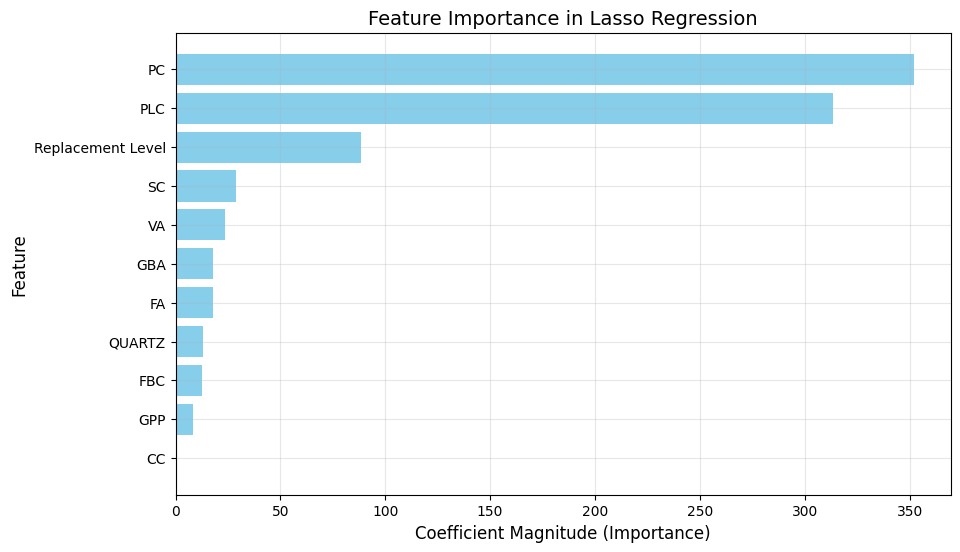

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Extract feature importance (coefficients)
lasso_coefficients = pd.DataFrame({
    'Feature': features.columns,
    'Coefficient': lasso_best.coef_
})

# Sort coefficients by absolute value for importance
lasso_coefficients['Importance'] = lasso_coefficients['Coefficient'].abs()
lasso_coefficients = lasso_coefficients.sort_values(by='Importance', ascending=False)

# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(lasso_coefficients['Feature'], lasso_coefficients['Importance'], color='skyblue')
plt.title("Feature Importance in Lasso Regression", fontsize=14)
plt.xlabel("Coefficient Magnitude (Importance)", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.gca().invert_yaxis()
plt.grid(alpha=0.3)
plt.show()

# Display the feature importance as a table
#import ace_tools as tools; tools.display_dataframe_to_user(name="Lasso Feature Importance", dataframe=lasso_coefficients)


In [ ]:
def predict_cumulative_heat():
    print("Enter the blend composition as percentages (values must sum up to 100%).")

    # Gather user input for blend components
    try:
        pc = float(input("Enter percentage of Portland Cement (PC): "))
        gpp = float(input("Enter percentage of Glass Powder (GPP): "))
        sc = float(input("Enter percentage of SC: "))
        cc = float(input("Enter percentage of CC: "))
        fa = float(input("Enter percentage of FA: "))
        va = float(input("Enter percentage of VA: "))
        gba = float(input("Enter percentage of GBA: "))
        fbc = float(input("Enter percentage of FBC: "))
        quartz = float(input("Enter percentage of Quartz: "))
        plc = float(input("Enter percentage of PLC: "))

        # Calculate Replacement Level
        replacement_level = 100 - pc

        # Ensure total percentages sum up to 100
        if not np.isclose(pc + gpp + sc + cc + fa + va + gba + fbc + quartz + plc, 100, atol=1e-2):
            print("Error: The percentages do not sum up to 100%. Please re-enter.")
            return

        # Create a DataFrame for the input
        input_data = pd.DataFrame([{
            'PC': pc,
            'GPP': gpp,
            'SC': sc,
            'CC': cc,
            'FA': fa,
            'VA': va,
            'GBA': gba,
            'FBC': fbc,
            'QUARTZ': quartz,
            'PLC': plc,
            'Replacement Level': replacement_level
        }])

        # Normalize the input using the same scaler as training
        normalized_input = scaler.transform(input_data)

        # Predict cumulative heat using the trained Lasso model
        predicted_heat = lasso_best.predict(normalized_input)

        # Output the prediction
        print(f"\nPredicted Cumulative Heat (J/g): {predicted_heat[0]:.2f}")

    except ValueError:
        print("Invalid input. Please enter numeric values only.")


In [ ]:
predict_cumulative_heat()


Enter the blend composition as percentages (values must sum up to 100%).
Enter percentage of Portland Cement (PC): 10
Enter percentage of Glass Powder (GPP): 30
Enter percentage of SC: 20
Enter percentage of CC: 0
Enter percentage of FA: 0
Enter percentage of VA: 0
Enter percentage of GBA: 0
Enter percentage of FBC: 0
Enter percentage of Quartz: 0
Enter percentage of PLC: 40

Predicted Cumulative Heat (J/g): 263.40


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
